# Starter - Identity Verification
---
Starter Identity Verification
You are working for a financial services company that wants to use Facial Biometrics (Face Recognition) to increase the security of their long term-accounts. Recently the company has had a run of elder abuse, where scammers are targeting your long-time customers trying to gain access to bank accounts to wire money overseas.


The company has provided you with a sample image set of individuals (about 60 images) and an excel file that maps the source image to the target image. The source image is the picture the customer took when they opened their account, the target image is a recent image of the customer several years later. Your job is to develop a python program to compare the source image to the target image and generate a similarity measure between the images.




---



1. Install face_recognition package
2. Download sample images
3. Now your job begins!
  - get your sample code working to, calcualte similarity
  - my advice is to use a for loop and function to make it easy
  - you'll be creating a new excel file with the updated similarity scores.


In [2]:
# install face_recognition package

import subprocess
import sys

# -- uncomment --

# subprocess.check_call([sys.executable, "-m", "pip", "install", "face_recognition"])
#!pip install face_recognition

In [3]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=0c6343e908df1260900d2ff9f90fe9fe5c3838af611647308675afeb6a593341
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [4]:
# import libraries
import requests
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# image stuff
import face_recognition
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageOps, ImageEnhance
# from google.colab.patches import cv2_imshow

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Example Loop over Excel file


---

1. import excel file


In [57]:
match_file = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/FinalMatchSourceTarget.xlsx")
match_file.head()

,match_id,source_image,name,target_image,expected_match
0,100,Bingyu_Li.jpg,Bingyu_Li,Bingyu_Li_aged.jpg,match
1,101,Whitney_Joyce_Isbell.jpg,Whitney_Joyce_Isbell,Whitney_Joyce_Isbell_aged.jpg,match
2,102,Qian_Chen.jpg,Qian_Chen,Qian_Chen_aged.jpg,match
3,103,Hanshuai_Shi.jpg,Hanshuai_Shi,Hanshuai_Shi_aged.jpg,match
4,104,Ruochen_Bao.jpg,Ruochen_Bao,Ruochen_Bao_aged.jpg,match


In [58]:
match_file[match_file['match_id'] == 189]

,match_id,source_image,name,target_image,expected_match
89,189,.ipynb_checkpoints,NaN,_aged.jpg,match


In [59]:
match_file = match_file[match_file['match_id'] != 189].reset_index(drop=True)

In [60]:
match_file

,match_id,source_image,name,target_image,expected_match
0,100,Bingyu_Li.jpg,Bingyu_Li,Bingyu_Li_aged.jpg,match
1,101,Whitney_Joyce_Isbell.jpg,Whitney_Joyce_Isbell,Whitney_Joyce_Isbell_aged.jpg,match
2,102,Qian_Chen.jpg,Qian_Chen,Qian_Chen_aged.jpg,match
3,103,Hanshuai_Shi.jpg,Hanshuai_Shi,Hanshuai_Shi_aged.jpg,match
4,104,Ruochen_Bao.jpg,Ruochen_Bao,Ruochen_Bao_aged.jpg,match
...,...,...,...,...,...
170,271,Yutong_Ouyang.jpg,NaN,Max_Koontz_aged.jpg,no match
171,272,Andrea_Chen.jpg,NaN,Joseph_Macon_Barker_aged.jpg,no match
172,273,Xiyan_Huang.jpg,NaN,Kayla_Marie_Williams_aged.jpg,no match
173,274,Angela_Waszkiewicz.jpg,NaN,Chengzhan_Shen_aged.jpg,no match




# 4. Compare two faces

1. load two faces using `load_image_file`
  - load_image_file : When you call load_image_file with a file path as an argument, it reads the image file from disk and converts it into a **NumPy array**. The NumPy array represents the image as a **matrix of pixel values**, where each pixel is represented by a set of **RGB (red, green, blue)** values.

2. Compare the `face_encodings` similarity using `face_distance` - this produces the Euclidean distance between two face encodings.  In facial recognition, a face encoding is a vector of numbers that represents the features of a face. Each element in the vector represents a different feature, such as the distance between the eyes or the shape of the jawline. The face encoding is generated by a neural network trained on large datasets of faces.

- The face_distance function takes two lists of face encodings as arguments and returns a list of distances between each pair of face encodings. The distance between two face encodings is a measure of how different the faces are from each other. **A lower distance value means that the faces are more similar** to each other, while a **higher distance value means that the faces are more different**.
- i like to normalize the distance by creating `similarity = 1 - distance`

3. The compare_faces function takes two lists of face encodings as arguments and returns a list of Boolean values that indicate whether the corresponding face encodings are a match or not. A True value means that the faces are a match, while a False value means that they are not a match.

4. Display side by side



# Expected match

In [94]:
# 1. load two faces usig load_image_file
face_file1 = "/content/2024_students/Hewei_Shen.jpg"
face_file2 = "/content/2024_students/Hewei_Shen_aged.jpg"
image1 = face_recognition.load_image_file(face_file1)
image2 = face_recognition.load_image_file(face_file2)


In [95]:
# 2. Compare the face_encodings similarity using face_distance
img1_encoding = face_recognition.face_encodings(image1)[0]
img2_encoding = face_recognition.face_encodings(image2)[0]

# Calculate the distance between the faces
face_distance = face_recognition.face_distance([img1_encoding], img2_encoding)

# Normalize the distance to get the similarity score
similarity = 1 - face_distance[0]

# Print the similarity score
print("The two faces are '{:.2f}%' similar".format(similarity*100))


The two faces are '63.26%' similar


In [96]:
# 3. is it a match?
face_matches = face_recognition.compare_faces([img1_encoding], img2_encoding)

# Print the result
if face_matches[0]:
    print("The two faces match")
else:
    print("The two faces do not match")

The two faces match


# Expected non-match

In [99]:
# 1. load two faces usig load_image_file
face_file1 = "/content/2024_students/Hewei_Shen.jpg"
face_file2 = "/content/2024_students/Max_Koontz.jpg"
image1 = face_recognition.load_image_file(face_file1)
image2 = face_recognition.load_image_file(face_file2)


In [100]:
# 2. Compare the face_encodings similarity using face_distance
img1_encoding = face_recognition.face_encodings(image1)[0]
img2_encoding = face_recognition.face_encodings(image2)[0]

# Calculate the distance between the faces
face_distance = face_recognition.face_distance([img1_encoding], img2_encoding)

# Normalize the distance to get the similarity score
similarity = 1 - face_distance[0]

# Print the similarity score
print("The two faces are '{:.2f}%' similar".format(similarity*100))


The two faces are '18.01%' similar


In [101]:
# 3. is it a match?
face_matches = face_recognition.compare_faces([img1_encoding], img2_encoding)

# Print the result
if face_matches[0]:
    print("The two faces match")
else:
    print("The two faces do not match")

The two faces do not match


In [97]:
# 4. Display Side by Side

# Open the two image files
image1 = Image.open(face_file1)
image2 = Image.open(face_file2)

# Get the dimensions of the images
width1, height1 = image1.size
width2, height2 = image2.size

# Create a new blank image with a size equal to the sum of the widths of the two images
new_image = Image.new("RGB", (width1 + width2, max(height1, height2)))

# Paste the first image onto the new image at position (0, 0)
new_image.paste(image1, (0, 0))

# Paste the second image onto the new image at position (width1, 0)
new_image.paste(image2, (width1, 0))

# Add text to the image
text = '{} % MATCH'.format(int(similarity*100))
font = ImageFont.truetype("images/Roboto-Medium.ttf", size=48)
draw = ImageDraw.Draw(new_image)
text_width, text_height = draw.textsize(text, font)
left = 900
top =  100
right = left + text_width
bottom = top + text_height
draw.rectangle(((left, top), (right, bottom)), fill=(255, 255, 255, 128))
draw.text((left, top), text, font=font, fill=(0, 0, 0, 255))

# Save the new image to a file
new_image.save("merged_image.jpg")

# Display the new image
new_image.show()

OSError: ignored

# Automation
---

1. get a list of all files
2. generate encodings of faces
3. loop through matches
    - catch similarity

In [ ]:
dir_name = 'images'
def list_jpeg_files(directory):
    """List all JPEG files in the specified directory."""
    jpeg_files = [file for file in os.listdir(directory) if file.lower().endswith(('.jpeg', '.jpg'))]
    return jpeg_files


# Replace 'your_directory_path' with the path to the directory you want to search
directory_path = './images_2024'
jpeg_files = list_jpeg_files(directory_path)

print("JPEG files in the directory:", jpeg_files)

JPEG files in the directory: ['Quinn_Poole.jpg', 'Zihe_Liu_aged.jpg', 'John_William_Null.jpg', 'Haopeng_Liu.jpg', 'Yuchen_Qin_aged.jpg', 'Andrew_Lloyd_Loftis_aged.jpg', 'Andrea_Chen_aged.jpg', 'Kendall_Ashley_Hilson.jpg', 'Shuzhe_Wang.jpg', 'Jeremy_Brian_Nurding.jpg', 'Millie_C_Garrett_aged.jpg', 'Kaushik_Rajaram.jpg', 'Bingyu_Li_aged.jpg', 'Jacob_Philip_Rockaway_aged.jpg', 'Qian_Chen.jpg', 'Logan_Trujillo.jpg', 'Patrick_Ryan_Weimaker_aged.jpg', 'Manling_Shi_aged.jpg', 'Manling_Shi.jpg', 'Guangxin_Bao_aged.jpg', 'Alicia_Rand_Bodoia_aged.jpg', 'Yiming_Xu.jpg', 'Zaul_Alexander_Perez.jpg', 'Andrea_Chen.jpg', 'Ruochen_Bao.jpg', 'Alicia_Rand_Bodoia.jpg', 'Nathalie_Lisa_Friedman.jpg', 'Helen_Kidane_Haile_aged.jpg', 'Estefani_Santiago_Gatica.jpg', 'Logan_Trujillo_aged.jpg', 'Alfredo_Enrique_Suarez.jpg', 'Khushi_Arya.jpg', 'Xiaoyang_Zheng_aged.jpg', 'Edward_Cheongjoun_Hyun_aged.jpg', 'Lu_Xing.jpg', 'Qin_Miao.jpg', 'Jeremy_Brian_Nurding_aged.jpg', 'Sebastian_Andres_Lopez-Ibanez_aged.jpg', 'Evan

In [ ]:
'''
face_dict = {}
for file in jpeg_files:
  try:
    # load image
    img = face_recognition.load_image_file(f"./images_2024/{file}")
    # get encoding
    enc = face_recognition.face_encodings(img)[0]
    face_dict[file] = enc
  except IndexError:
    print('No face found in file: {file}')
'''

No face found in file: {file}
No face found in file: {file}


In [ ]:
'''
import pickle
# Save the face encoding to a file
with open('encodings.pickle', 'wb') as f:
  pickle.dump(face_dict, f)
'''

In [9]:
import pickle
# Load the encoding pickle if you lose it
with open('/content/drive/MyDrive/Colab Notebooks/encodings.pickle', 'rb') as f:
  face_dict = pickle.load(f)

In [41]:
# convert to dataframe
data_items = list(face_dict.items())

# Create DataFrame
face_df = pd.DataFrame(data_items, columns=['image', 'encoding'])
face_df

,image,encoding
0,Quinn_Poole.jpg,"[-0.15118327736854553, 0.11046359688043594, -0..."
1,Zihe_Liu_aged.jpg,"[-0.059683606028556824, 0.09429924935102463, -..."
2,John_William_Null.jpg,"[-0.2585400938987732, 0.15704107284545898, 0.0..."
3,Haopeng_Liu.jpg,"[-0.04198088496923447, 0.05993002653121948, 0...."
4,Yuchen_Qin_aged.jpg,"[-0.050677746534347534, 0.1779090166091919, 0...."
...,...,...
244,Marcus_Cole_cooper.jpg,"[-0.08776486665010452, 0.05414488911628723, -0..."
245,Luying_Huang_aged.jpg,"[-0.09294100105762482, 0.05189449340105057, 0...."
246,Xingyu_Wan_aged.jpg,"[-0.06722845882177353, 0.12568436563014984, 0...."
247,Trinity_Nicole_Elliott.jpg,"[-0.17130142450332642, 0.018502719700336456, 0..."


In [51]:
# face match function
def match_faces(image1, image2):
  similarity = 0
  try:
    enc1 = face_df.query('image == @image1')['encoding'].iloc[0]
    enc2 = face_df.query('image == @image2')['encoding'].iloc[0]
    # print(enc1)

    # Calculate the distance between the faces
    face_distance = face_recognition.face_distance([enc1], enc2)

    # Normalize the distance to get the similarity score
    similarity = 1 - face_distance[0]

    # Print the similarity score
    print("The two faces are '{:.2f}%' similar".format(similarity*100))
    return similarity*100
  except:
    print("The two faces are '{:.2f}%' similar".format(similarity*100))
    return similarity

match_faces('Hewei_Shen.jpg','Hewei_Shen_aged.jpg')

The two faces are '63.26%' similar


63.25758210415097

In [61]:
# match_file['match_similarity'] = match_file.apply(lambda row: match_faces(row['source_image'], row['target_image']), axis=1)
for i in range(match_file.shape[0]):
  match_file.at[i,'match_similarity'] = match_faces(match_file.loc[i,'source_image'], match_file.loc[i,'target_image'])

The two faces are '62.97%' similar
The two faces are '56.22%' similar
The two faces are '55.91%' similar
The two faces are '59.16%' similar
The two faces are '29.60%' similar
The two faces are '64.81%' similar
The two faces are '47.93%' similar
The two faces are '56.07%' similar
The two faces are '64.94%' similar
The two faces are '74.32%' similar
The two faces are '61.83%' similar
The two faces are '66.68%' similar
The two faces are '32.34%' similar
The two faces are '57.85%' similar
The two faces are '56.96%' similar
The two faces are '66.75%' similar
The two faces are '59.52%' similar
The two faces are '69.07%' similar
The two faces are '57.35%' similar
The two faces are '53.23%' similar
The two faces are '49.74%' similar
The two faces are '63.26%' similar
The two faces are '69.86%' similar
The two faces are '57.70%' similar
The two faces are '59.49%' similar
The two faces are '62.18%' similar
The two faces are '68.69%' similar
The two faces are '64.88%' similar
The two faces are '5

In [62]:
match_file['match_similarity']

0      62.974082
1      56.220322
2      55.914954
3      59.155936
4      29.603802
         ...    
170     8.080489
171     5.657232
172    17.498774
173    14.210001
174     1.778727
Name: match_similarity, Length: 175, dtype: float64

In [81]:
match_file['predicted_match'] = np.where(match_file['match_similarity'] > 50, 'match','no match')

In [82]:
match_file

,match_id,source_image,name,target_image,expected_match,match_similarity,predicted_match
0,100,Bingyu_Li.jpg,Bingyu_Li,Bingyu_Li_aged.jpg,match,62.974082,match
1,101,Whitney_Joyce_Isbell.jpg,Whitney_Joyce_Isbell,Whitney_Joyce_Isbell_aged.jpg,match,56.220322,match
2,102,Qian_Chen.jpg,Qian_Chen,Qian_Chen_aged.jpg,match,55.914954,match
3,103,Hanshuai_Shi.jpg,Hanshuai_Shi,Hanshuai_Shi_aged.jpg,match,59.155936,match
4,104,Ruochen_Bao.jpg,Ruochen_Bao,Ruochen_Bao_aged.jpg,match,29.603802,no match
...,...,...,...,...,...,...,...
170,271,Yutong_Ouyang.jpg,NaN,Max_Koontz_aged.jpg,no match,8.080489,no match
171,272,Andrea_Chen.jpg,NaN,Joseph_Macon_Barker_aged.jpg,no match,5.657232,no match
172,273,Xiyan_Huang.jpg,NaN,Kayla_Marie_Williams_aged.jpg,no match,17.498774,no match
173,274,Angela_Waszkiewicz.jpg,NaN,Chengzhan_Shen_aged.jpg,no match,14.210001,no match


In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Calculate confusion matrix
matrix = confusion_matrix(match_file['expected_match'],
                          match_file['predicted_match'],
                          labels=["match", "no match"])

print(matrix)

[[110  15]
 [  2  48]]


In [84]:
# Calculate confusion matrix
y_true = match_file['expected_match']
y_pred = match_file['predicted_match']
labels = ["match", "no match"]
matrix = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate Accuracy, Precision and Recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label="match")
recall = recall_score(y_true, y_pred, pos_label="match")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9028571428571428
Precision: 0.9821428571428571
Recall: 0.88


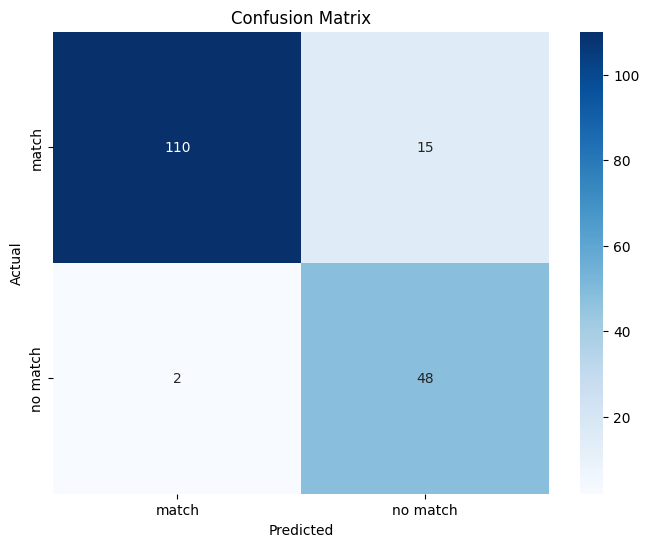

In [87]:
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

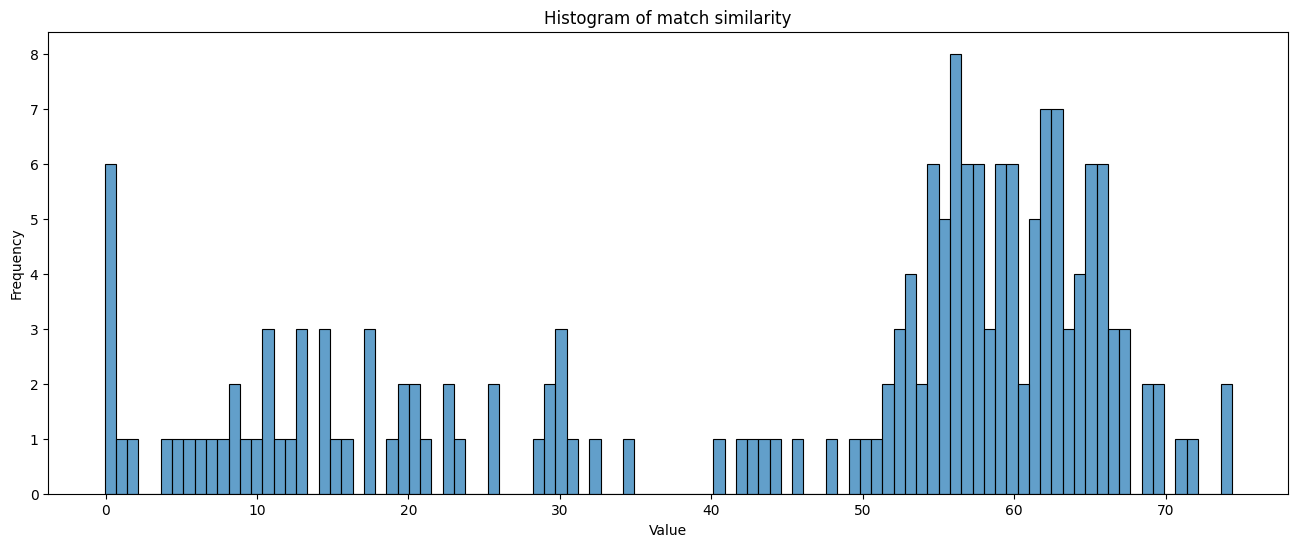

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 6))
sns.histplot(match_file['match_similarity'], bins=100, kde=False, alpha=0.7)
plt.title('Histogram of match similarity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [69]:
match_file[(match_file['expected_match'] == 'match') &
           (match_file['predicted_match'] == 'match')].sort_values(by = 'match_similarity',ascending = False)

,match_id,source_image,name,target_image,expected_match,match_similarity,predicted_match
88,188,Qin_Miao.jpg,Qin_Miao,Qin_Miao_aged.jpg,match,74.369621,match
9,109,Mengyao_Liu.jpg,Mengyao_Liu,Mengyao_Liu_aged.jpg,match,74.315907,match
107,208,Tianyu_Cui.jpg,Tianyu_Cui,Tianyu_Cui_aged.jpg,match,71.875195,match
118,219,Yilin_Wang.jpg,Yilin_Wang,Yilin_Wang_aged.jpg,match,70.971478,match
22,122,Andrea_Chen.jpg,Andrea_Chen,Andrea_Chen_aged.jpg,match,69.862912,match
...,...,...,...,...,...,...,...
51,151,Kaamil_Farooqi.jpg,Kaamil_Farooqi,Kaamil_Farooqi_aged.jpg,match,52.497377,match
33,133,Tianyi_Chen.jpg,Tianyi_Chen,Tianyi_Chen_aged.jpg,match,52.297853,match
120,221,Xingyu_Wan.jpg,Xingyu_Wan,Xingyu_Wan_aged.jpg,match,52.055072,match
28,128,Jodie_Elizabeth_Brine.jpg,Jodie_Elizabeth_Brine,Jodie_Elizabeth_Brine_aged.jpg,match,51.318014,match


In [70]:
match_file[(match_file['expected_match'] == 'match') &
           (match_file['predicted_match'] == 'no match')].sort_values(by = 'match_similarity',ascending = False)

,match_id,source_image,name,target_image,expected_match,match_similarity,predicted_match
95,196,Reid_Powers_Walker.jpg,Reid_Powers_Walker,Reid_Powers_Walker_aged.jpg,match,49.955566,no match
20,120,Tianyi_Yin.jpg,Tianyi_Yin,Tianyi_Yin_aged.jpg,match,49.738276,no match
6,106,Mary_Martha_Milcoff.jpg,Mary_Martha_Milcoff,Mary_Martha_Milcoff_aged.jpg,match,47.927794,no match
64,164,Christopher_David_Koontz.jpg,Christopher_David_Koontz,Christopher_David_Koontz_aged.jpg,match,45.892240,no match
106,207,Chioke_K_Bellamy.jpg,Chioke_K_Bellamy,Chioke_K_Bellamy_aged.jpg,match,44.340587,no match
111,212,Marcus_Cole_cooper.jpg,Marcus_Cole_cooper,Marcus_Cole_cooper_aged.jpg,match,43.535482,no match
79,179,Christopher_Craig_Kenney.jpg,Christopher_Craig_Kenney,Christopher_Craig_Kenney_aged.jpg,match,42.318049,no match
80,180,Hangfei_Lyu.jpg,Hangfei_Lyu,Hangfei_Lyu_aged.jpg,match,40.370738,no match
12,112,Latham_Alexander_Weaver.jpg,Latham_Alexander_Weaver,Latham_Alexander_Weaver_aged.jpg,match,32.343801,no match
4,104,Ruochen_Bao.jpg,Ruochen_Bao,Ruochen_Bao_aged.jpg,match,29.603802,no match


In [71]:
print(match_file[(match_file['match_similarity']==0)&(match_file['expected_match']=='match')].shape[0])
match_file[(match_file['match_similarity']==0)&(match_file['expected_match']=='match')]

2


,match_id,source_image,name,target_image,expected_match,match_similarity,predicted_match
76,176,Jash_Sanjaybhai_Vachhani.jpg,Jash_Sanjaybhai_Vachhani,Jash_Sanjaybhai_Vachhani_aged.jpg,match,0.0,no match
100,201,Quinn_Poole.jpg,Quinn_Poole,Quinn_Poole_aged.jpg,match,0.0,no match


# Try 40 threshold

In [88]:
match_file['predicted_match'] = np.where(match_file['match_similarity'] > 40, 'match','no match')

In [89]:
match_file

,match_id,source_image,name,target_image,expected_match,match_similarity,predicted_match
0,100,Bingyu_Li.jpg,Bingyu_Li,Bingyu_Li_aged.jpg,match,62.974082,match
1,101,Whitney_Joyce_Isbell.jpg,Whitney_Joyce_Isbell,Whitney_Joyce_Isbell_aged.jpg,match,56.220322,match
2,102,Qian_Chen.jpg,Qian_Chen,Qian_Chen_aged.jpg,match,55.914954,match
3,103,Hanshuai_Shi.jpg,Hanshuai_Shi,Hanshuai_Shi_aged.jpg,match,59.155936,match
4,104,Ruochen_Bao.jpg,Ruochen_Bao,Ruochen_Bao_aged.jpg,match,29.603802,no match
...,...,...,...,...,...,...,...
170,271,Yutong_Ouyang.jpg,NaN,Max_Koontz_aged.jpg,no match,8.080489,no match
171,272,Andrea_Chen.jpg,NaN,Joseph_Macon_Barker_aged.jpg,no match,5.657232,no match
172,273,Xiyan_Huang.jpg,NaN,Kayla_Marie_Williams_aged.jpg,no match,17.498774,no match
173,274,Angela_Waszkiewicz.jpg,NaN,Chengzhan_Shen_aged.jpg,no match,14.210001,no match


In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Calculate confusion matrix
matrix = confusion_matrix(match_file['expected_match'],
                          match_file['predicted_match'],
                          labels=["match", "no match"])

print(matrix)

[[118   7]
 [  3  47]]


In [91]:
# Calculate confusion matrix
y_true = match_file['expected_match']
y_pred = match_file['predicted_match']
labels = ["match", "no match"]
matrix = confusion_matrix(y_true, y_pred, labels=labels)

# Calculate Accuracy, Precision and Recall
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label="match")
recall = recall_score(y_true, y_pred, pos_label="match")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9428571428571428
Precision: 0.9752066115702479
Recall: 0.944


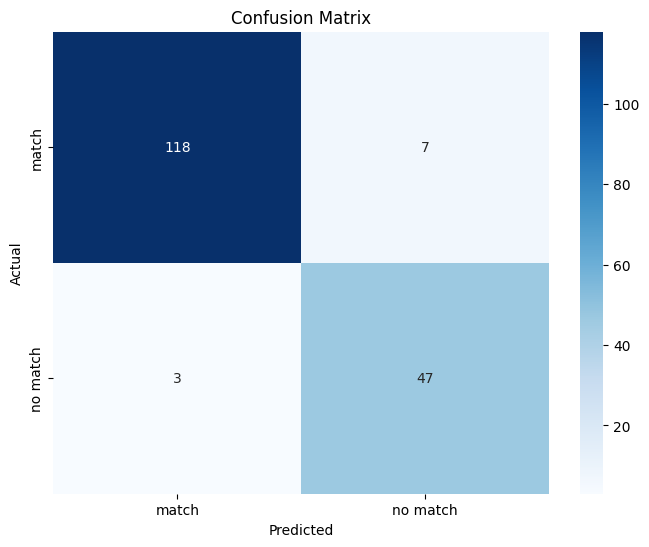

In [92]:
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [102]:
%%shell
jupyter nbconvert '/content/drive/MyDrive/Colab Notebooks/UseCase1FR.ipynb' --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/UseCase1FR.ipynb to html
[NbConvertApp] Writing 823643 bytes to /content/drive/MyDrive/Colab Notebooks/UseCase1FR.html
